<a href="https://colab.research.google.com/github/ellieyakim0829/dataAnalysis/blob/main/2_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_OpenAPI_%EC%8B%A4%EC%8A%B5_20240429.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석

## 5. OpenAPI를 이용한 데이터 수집

- <a href="#1)OpenAPI통한데이터수집">1) OpenAPI 통한 데이터 수집</a>
- <a href="#2)한글텍스트Cleansing">2) 한글 텍스트 Cleansing</a>
- <a href="#3)웹이미지수집하기">3) 웹 이미지 수집하기</a>

### #그래프에서 한글사용하는 방법
- **(코랩에서)한글폰트 설치하기**

In [38]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 코랩에서 위 코드를 실행시킨 후  반드시 코랩 메뉴: "런타임>런타임 다시 시작" 합니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and direc

- **한글 폰트 지정하기**

In [1]:
# 코랩에서 한글 폰트 종류와 이름이 win과 다를 수 있다!!!
# 코랩: NanumGothic, 윈도우: Malgun Gothic
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'NanumBarunGothic',
                     'font.size': 12,
                     'figure.figsize': (6, 4),
                     'axes.unicode_minus':  False }) # 폰트 설정

---

### <a name="1)OpenAPI통한데이터수집">1) OpenAPI 통한 데이터 수집</a>

#### 1.도서관 정보나루  OpenAPI 신청하기
*  도서관 데이터 제공, 신청 활용 가능
    - 오픈 API 활용 방법: https://www.data4library.kr/apiUtilization
    - OpenAPI 신청하기: https://www.data4library.kr/myPage?isValid=true

#### 2.네이버 OpenAPI 사용하기
* 검색
    - 1.책 검색
    - 2.뉴스 검색
    - 3.쇼핑 검색

#### [실습] : 네이버 검색 API 사용하여 데이터 수집하기

In [3]:
# 정적 크롤링을 위한 requests 설치
!pip install requests

# 도서관 정보나루 api 활용하기


In [ ]:
import requests
import xml.etree.ElementTree as ET

# URL 설정
url = "http://data4library.kr/api/loanItemSrch?authKey=b8604a40cf9f0ce1e10c1d20ac9c70e6b6ddf0a5b7b751370b67131552680c20&startDt=2022-01-01&endDt=2022-03-31&gender=1&age=20&region=11;31&addCode=0&kdc=6&pageNo=1&pageSize=10"

# GET 요청을 보내고 응답을 받습니다.
r = requests.get(url)

# 응답의 인코딩을 UTF-8로 설정합니다.
r.encoding = 'UTF-8'

# 응답을 XML 형식으로 파싱합니다.
tree = ET.fromstring(r.text)
print(tree)

<Element 'response' at 0x7e221808ea70>


In [49]:
import requests
import xml.etree.ElementTree as ET

url = 'http://data4library.kr/api/loanItemSrch?authKey=b8604a40cf9f0ce1e10c1d20ac9c70e6b6ddf0a5b7b751370b67131552680c20&startDt=2023-04-01&endDt=2024-04-29&gender=0;1&age=8;20;30;40;50;60&region=11&addCode=0;1;2;4;5;6;7;9&kdc=0;1;2;3;4;5;6;7;8;9'

# URL에서 XML 데이터를 가져옵니다.
response = requests.get(url)

# 응답의 텍스트를 XML 문자열로 변환합니다.
xml_data = response.text

# XML 문자열을 파싱합니다.
root = ET.fromstring(xml_data)

# 각 도서 정보에 접근하여 출력합니다.
for doc in root.findall('docs/doc'):
    bookname = doc.find('bookname').text
    ranking = doc.find('ranking').text
    authors = doc.find('authors').text
    publisher = doc.find('publisher').text
    publication_year = doc.find('publication_year').text
    isbn13 = doc.find('isbn13').text
    loan_count = doc.find('loan_count').text
    print("도서명:", bookname)
    print("순위",ranking)
    print("저자:", authors)
    print("출판사:", publisher)
    print("출판년도:", publication_year)
    print("ISBN:", isbn13)
    print("대출 횟수:", loan_count)


    print("-----")


도서명: 불편한 편의점 :김호연 장편소설
순위 1
저자: 지은이: 김호연
출판사: 나무옆의자
출판년도: 2021
ISBN: 9791161571188
대출 횟수: 8732
-----
도서명: 불편한 편의점 :김호연 장편소설
순위 2
저자: 지은이: 김호연
출판사: 나무옆의자
출판년도: 2022
ISBN: 9791161571379
대출 횟수: 7295
-----
도서명: 아버지의 해방일지 :정지아 장편소설
순위 3
저자: 지은이: 정지아
출판사: 창비
출판년도: 2022
ISBN: 9788936438838
대출 횟수: 7267
-----
도서명: 달러구트 꿈 백화점 :이미예 장편소설
순위 4
저자: 지은이: 이미예
출판사: 팩토리나인
출판년도: 2020
ISBN: 9791165341909
대출 횟수: 5712
-----
도서명: 역행자 :돈·시간·운명으로부터 완전한 자유를 얻는 7단계 인생 공략집
순위 5
저자: 자청 지음
출판사: 웅진씽크빅
출판년도: 2022
ISBN: 9788901260716
대출 횟수: 5391
-----
도서명: 물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기
순위 6
저자: 룰루 밀러 지음 ;정지인 옮김
출판사: 곰출판
출판년도: 2021
ISBN: 9791189327156
대출 횟수: 5325
-----
도서명: 밝은 밤 :최은영 장편소설
순위 7
저자: 지은이: 최은영
출판사: 문학동네
출판년도: 2021
ISBN: 9788954681179
대출 횟수: 5097
-----
도서명: 어서오세요, 휴남동 서점입니다 :황보름 장편소설
순위 8
저자: 지은이: 황보름
출판사: 클레이하우스
출판년도: 2022
ISBN: 9791197377143
대출 횟수: 4988
-----
도서명: 작별인사 :김영하 장편소설
순위 9
저자: 지은이: 김영하
출판사: 복복서가
출판년도: 2022
ISBN: 9791191114225
대출 횟수: 4843
-----
도서명: 파친코 :이민진 장편소설
순위 10
저자: 이민진 지음

In [24]:
!pip install xmltodict

#  도서관 API 가져오기
## XML 형식파일을 JSON 형식으로 바꾸어 데이터 추출



In [112]:
import requests
import xmltodict
import json
import os
import sys
import urllib.request
import datetime
import time
import pandas as pd

url = 'http://data4library.kr/api/loanItemSrch?authKey=b8604a40cf9f0ce1e10c1d20ac9c70e6b6ddf0a5b7b751370b67131552680c20&startDt=2023-04-01&endDt=2024-04-29&gender=0;1&age=8;20;30;40;50;60&region=11&addCode=0;1;2;4;5;6;7;9&kdc=0;1;2;3;4;5;6;7;8;9'

# URL에서 XML 데이터추출
response = requests.get(url)

# XML 데이터를 파싱하여 OrderedDict로 변환
xml_data = xmltodict.parse(response.text)


# # OrderedDict를 JSON 문자열로 변환
# json_data = json.dumps(xml_data, indent=4)  Unicode 문자열이 JSON으로 변환될 때 인코딩 문제가 발생함
#문제를 해결하려면 ensure_ascii=False 옵션을 사용하여 JSON으로 변환할 때 ASCII 이외의 문자를 모두 이스케이프하지 않도록 설정

#ensure_ascii=False 옵션을 사용하여 Unicode 문자열을 이스케이프하지 않음
json_data = json.dumps(xml_data, ensure_ascii=False, indent=4)

# JSON 데이터를 출력
print(json_data)


# json_data를 파이썬 객체로 변환
data = json.loads(json_data)

# 도서 정보를 저장할 리스트를 초기화
books = []

# 도서 정보를 리스트에 추가
for d in data['response']['docs']['doc']:
    books.append(d)

# 결과출력
print(books)

{
    "response": {
        "request": {
            "startDt": "2023-04-01",
            "endDt": "2024-04-29",
            "gender": "0;1",
            "age": "8;20;30;40;50;60",
            "addCode": "0;1;2;4;5;6;7;9",
            "kdc": "0;1;2;3;4;5;6;7;8;9",
            "region": "11",
            "pageNo": "1",
            "pageSize": "200"
        },
        "resultNum": "200",
        "numFound": "5000",
        "docs": {
            "doc": [
                {
                    "no": "1",
                    "ranking": "1",
                    "bookname": "불편한 편의점 :김호연 장편소설",
                    "authors": "지은이: 김호연",
                    "publisher": "나무옆의자",
                    "publication_year": "2021",
                    "isbn13": "9791161571188",
                    "addition_symbol": "03810",
                    "vol": null,
                    "class_no": "813.7",
                    "class_nm": "문학 > 한국문학 > 소설",
                    "loan_count": "8732",
            

In [131]:
# books 데이터를 DataFrame으로 변환
books_df = pd.DataFrame(books)
# DataFrame의 상위 2개 행 출력 확인
books_df.head(2)

,no,ranking,bookname,authors,publisher,publication_year,isbn13,addition_symbol,vol,class_no,class_nm,loan_count,bookImageURL,bookDtlUrl
0,1,1,불편한 편의점 :김호연 장편소설,지은이: 김호연,나무옆의자,2021,9791161571188,03810,None,813.7,문학 > 한국문학 > 소설,8732,https://image.aladin.co.kr/product/26942/84/co...,https://data4library.kr/bookV?seq=5962217
1,2,2,불편한 편의점 :김호연 장편소설,지은이: 김호연,나무옆의자,2022,9791161571379,03810,2,813.7,문학 > 한국문학 > 소설,7295,https://image.aladin.co.kr/product/29858/98/co...,https://data4library.kr/bookV?seq=6529613


In [114]:
books_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   no                200 non-null    object
 1   ranking           200 non-null    object
 2   bookname          200 non-null    object
 3   authors           200 non-null    object
 4   publisher         200 non-null    object
 5   publication_year  200 non-null    object
 6   isbn13            200 non-null    object
 7   addition_symbol   200 non-null    object
 8   vol               116 non-null    object
 9   class_no          200 non-null    object
 10  class_nm          200 non-null    object
 11  loan_count        200 non-null    object
 12  bookImageURL      200 non-null    object
 13  bookDtlUrl        200 non-null    object
dtypes: object(14)
memory usage: 22.0+ KB


In [115]:
!pip install missingno

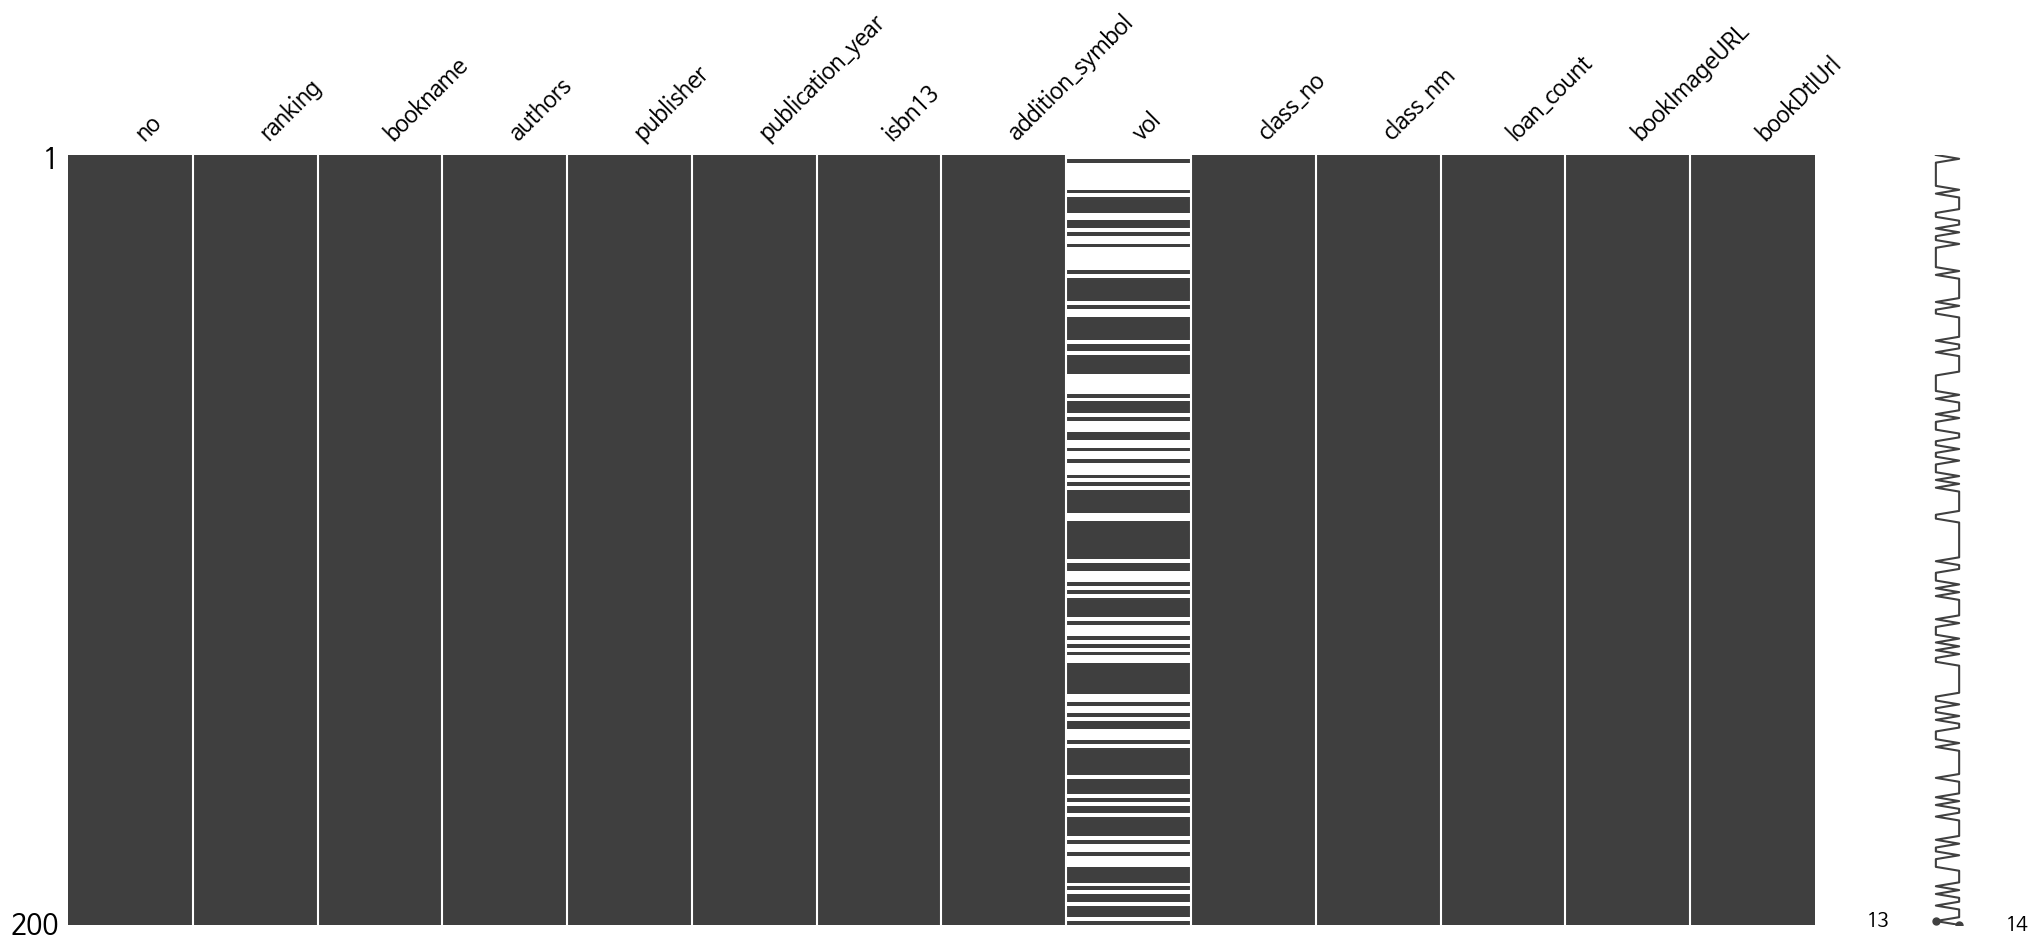

In [116]:
import missingno as msno
msno.matrix(books_df)
plt.show()

# 현재 DataFrame의 열 이름 확인

In [132]:
print(f"현재 DataFrame의 열 이름:, {books_df.columns}")
books_df.head(3)

현재 DataFrame의 열 이름:, Index(['no', 'ranking', 'bookname', 'authors', 'publisher', 'publication_year',
       'isbn13', 'addition_symbol', 'vol', 'class_no', 'class_nm',
       'loan_count', 'bookImageURL', 'bookDtlUrl'],
      dtype='object')


,no,ranking,bookname,authors,publisher,publication_year,isbn13,addition_symbol,vol,class_no,class_nm,loan_count,bookImageURL,bookDtlUrl
0,1,1,불편한 편의점 :김호연 장편소설,지은이: 김호연,나무옆의자,2021,9791161571188,03810,None,813.7,문학 > 한국문학 > 소설,8732,https://image.aladin.co.kr/product/26942/84/co...,https://data4library.kr/bookV?seq=5962217
1,2,2,불편한 편의점 :김호연 장편소설,지은이: 김호연,나무옆의자,2022,9791161571379,03810,2,813.7,문학 > 한국문학 > 소설,7295,https://image.aladin.co.kr/product/29858/98/co...,https://data4library.kr/bookV?seq=6529613
2,3,3,아버지의 해방일지 :정지아 장편소설,지은이: 정지아,창비,2022,9788936438838,03810,None,813.62,문학 > 한국문학 > 소설,7267,https://image.aladin.co.kr/product/30048/51/co...,https://data4library.kr/bookV?seq=6551957


# 컬럼명 변경하기

In [133]:
# 컬럼명 변경하기
# 컬럼명 변경하려면 원본 데이터프레임의 열의 수는 14개인데 새로운 컬럼명 리스트의 요소 개수는 11개로 일치하지 않아 먼저 불필요한 컬럼은 삭제하고
# 컬럼명을 변경해야 한다.

# 필요없는 열을 제거하여 새로운 데이터프레임 생성
books_df = books_df.drop(['addition_symbol', 'vol', 'class_no'], axis=1)

# 새로운 컬럼명 리스트를 사용하여 컬럼명 변경
books_df.columns = ['순번', '순위', '도서명', '저자명', '출판사', '출판년도', 'isbn13', '주제분류명', '대출건수', '책표지URL', '도서상세페이지 URL']


In [134]:
# 결과 확인
books_df.head(5)

,순번,순위,도서명,저자명,출판사,출판년도,isbn13,주제분류명,대출건수,책표지URL,도서상세페이지 URL
0,1,1,불편한 편의점 :김호연 장편소설,지은이: 김호연,나무옆의자,2021,9791161571188,문학 > 한국문학 > 소설,8732,https://image.aladin.co.kr/product/26942/84/co...,https://data4library.kr/bookV?seq=5962217
1,2,2,불편한 편의점 :김호연 장편소설,지은이: 김호연,나무옆의자,2022,9791161571379,문학 > 한국문학 > 소설,7295,https://image.aladin.co.kr/product/29858/98/co...,https://data4library.kr/bookV?seq=6529613
2,3,3,아버지의 해방일지 :정지아 장편소설,지은이: 정지아,창비,2022,9788936438838,문학 > 한국문학 > 소설,7267,https://image.aladin.co.kr/product/30048/51/co...,https://data4library.kr/bookV?seq=6551957
3,4,4,달러구트 꿈 백화점 :이미예 장편소설,지은이: 이미예,팩토리나인,2020,9791165341909,문학 > 한국문학 > 소설,5712,https://image.aladin.co.kr/product/24512/70/co...,https://data4library.kr/bookV?seq=5707051
4,5,5,역행자 :돈·시간·운명으로부터 완전한 자유를 얻는 7단계 인생 공략집,자청 지음,웅진씽크빅,2022,9788901260716,사회과학 > 경제학 > 경영관리,5391,https://image.aladin.co.kr/product/29521/63/co...,https://data4library.kr/bookV?seq=6468069


# 특정 문자열 바꾸기
- **문자열에서 특정 문자 제거**: '주제분류명' 값중에 '주제>분류' 형태로 되어 있는 구조에서  '-'기호를 바꾸기

In [138]:
# books_df['주제분류명'] = books_df['주제분류명'].str.replace(pat='-', repl='' )
books_df['주제분류명'] = books_df['주제분류명'].str.replace('>', '-' )
books_df.head(5)

,순번,순위,도서명,저자명,출판사,출판년도,isbn13,주제분류명,대출건수,책표지URL,도서상세페이지 URL
0,1,1,불편한 편의점 :김호연 장편소설,지은이: 김호연,나무옆의자,2021,9791161571188,문학 - 한국문학 - 소설,8732,https://image.aladin.co.kr/product/26942/84/co...,https://data4library.kr/bookV?seq=5962217
1,2,2,불편한 편의점 :김호연 장편소설,지은이: 김호연,나무옆의자,2022,9791161571379,문학 - 한국문학 - 소설,7295,https://image.aladin.co.kr/product/29858/98/co...,https://data4library.kr/bookV?seq=6529613
2,3,3,아버지의 해방일지 :정지아 장편소설,지은이: 정지아,창비,2022,9788936438838,문학 - 한국문학 - 소설,7267,https://image.aladin.co.kr/product/30048/51/co...,https://data4library.kr/bookV?seq=6551957
3,4,4,달러구트 꿈 백화점 :이미예 장편소설,지은이: 이미예,팩토리나인,2020,9791165341909,문학 - 한국문학 - 소설,5712,https://image.aladin.co.kr/product/24512/70/co...,https://data4library.kr/bookV?seq=5707051
4,5,5,역행자 :돈·시간·운명으로부터 완전한 자유를 얻는 7단계 인생 공략집,자청 지음,웅진씽크빅,2022,9788901260716,사회과학 - 경제학 - 경영관리,5391,https://image.aladin.co.kr/product/29521/63/co...,https://data4library.kr/bookV?seq=6468069


In [139]:
books_df.head(2)

,순번,순위,도서명,저자명,출판사,출판년도,isbn13,주제분류명,대출건수,책표지URL,도서상세페이지 URL
0,1,1,불편한 편의점 :김호연 장편소설,지은이: 김호연,나무옆의자,2021,9791161571188,문학 - 한국문학 - 소설,8732,https://image.aladin.co.kr/product/26942/84/co...,https://data4library.kr/bookV?seq=5962217
1,2,2,불편한 편의점 :김호연 장편소설,지은이: 김호연,나무옆의자,2022,9791161571379,문학 - 한국문학 - 소설,7295,https://image.aladin.co.kr/product/29858/98/co...,https://data4library.kr/bookV?seq=6529613


# 도서명에서 중복되는 값 제거 하기

In [141]:
# '도서명' 열을 기준으로 중복된 값을 제거하고 새로운 DataFrame을 생성하기
#  중복되는  총개수와 중복되는 책 이름 확인해보기
# print( f'#중복된 값 갯수:{len(books_df.도서명.unique())}' )
# print( f'#중복된 책 이름명:{books_df.도서명.unique()}' )

unique_books = books_df['도서명'].unique()
print(unique_books)

# '도서명' 열을 기준으로 중복된 행을 제거하여 새로운 DataFrame 생성
unique_df = books_df.drop_duplicates(subset=['도서명'])

# 새로운 DataFrame 출력
print(unique_df)

['불편한 편의점 :김호연 장편소설' '아버지의 해방일지 :정지아 장편소설' '달러구트 꿈 백화점 :이미예 장편소설'
 '역행자 :돈·시간·운명으로부터 완전한 자유를 얻는 7단계 인생 공략집'
 '물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기' '밝은 밤 :최은영 장편소설'
 '어서오세요, 휴남동 서점입니다 :황보름 장편소설' '작별인사 :김영하 장편소설' '파친코 :이민진 장편소설'
 '하얼빈 :김훈 장편소설' '고양이 해결사 깜냥' '돈의 속성 :최상위 부자가 말하는 돈에 대한 모든 것'
 '(이미 늦었다고 생각하는 당신을 위한) 김미경의 마흔 수업' '완전한 행복 :정유정 장편소설'
 '(서울 자가에 대기업 다니는) 김 부장 이야기' '순례 주택 :유은실 소설' '홍학의 자리 :정해연 장편소설'
 '지구 끝의 온실 :김초엽 장편소설' '바다가 들리는 편의점' '아몬드손원평 장편소설' '미드나잇 라이브러리'
 '세상의 마지막 기차역' '도둑맞은 집중력 :집중력 위기의 시대, 삶의 주도권을 되찾는 법' '흔한남매' 'H마트에서 울다'
 '(추리 천재) 엉덩이 탐정' '시선으로부터, :정세랑 장편소설' '(이상한 과자 가게) 전천당'
 '나미야 잡화점의 기적 :히가시노 게이고 장편소설' '작별하지 않는다 :한강 장편소설' '똥볶이 할멈 :K-히어로 판타지'
 '이토록 평범한 미래 :김연수 소설' '당신도 느리게 나이 들 수 있습니다 :나이가 들어도 몸의 시간을 젊게'
 '타이탄의 도구들 :1만 시간의 법칙을 깬 거인들의 61가지 전략' '가녀장의 시대 :이슬아 장편소설'
 '아주 작은 습관의 힘 :최고의 변화는 어떻게 만들어지는가' '천 개의 파랑 :천선란 장편소설'
 '우리가 빛의 속도로 갈 수 없다면 :김초엽 소설'
 '만일 내가 인생을 다시 산다면 :벌써 마흔이 된 당신에게 해 주고 싶은 말들 42' '낭만 강아지 봉봉'
 '원씽 :복잡한 세상을 이기는 단순함의 힘' '다정한 것이 살아남는다' '여행의 이유 :김영하 산

In [142]:
unique_df.head(10)

,순번,순위,도서명,저자명,출판사,출판년도,isbn13,주제분류명,대출건수,책표지URL,도서상세페이지 URL
0,1,1,불편한 편의점 :김호연 장편소설,지은이: 김호연,나무옆의자,2021,9791161571188,문학 - 한국문학 - 소설,8732,https://image.aladin.co.kr/product/26942/84/co...,https://data4library.kr/bookV?seq=5962217
2,3,3,아버지의 해방일지 :정지아 장편소설,지은이: 정지아,창비,2022,9788936438838,문학 - 한국문학 - 소설,7267,https://image.aladin.co.kr/product/30048/51/co...,https://data4library.kr/bookV?seq=6551957
3,4,4,달러구트 꿈 백화점 :이미예 장편소설,지은이: 이미예,팩토리나인,2020,9791165341909,문학 - 한국문학 - 소설,5712,https://image.aladin.co.kr/product/24512/70/co...,https://data4library.kr/bookV?seq=5707051
4,5,5,역행자 :돈·시간·운명으로부터 완전한 자유를 얻는 7단계 인생 공략집,자청 지음,웅진씽크빅,2022,9788901260716,사회과학 - 경제학 - 경영관리,5391,https://image.aladin.co.kr/product/29521/63/co...,https://data4library.kr/bookV?seq=6468069
5,6,6,"물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기",룰루 밀러 지음 ;정지인 옮김,곰출판,2021,9791189327156,자연과학 - 동물학 - 동물학,5325,https://image.aladin.co.kr/product/28465/73/co...,https://data4library.kr/bookV?seq=6360937
6,7,7,밝은 밤 :최은영 장편소설,지은이: 최은영,문학동네,2021,9788954681179,문학 - 한국문학 - 소설,5097,https://image.aladin.co.kr/product/27541/91/co...,https://data4library.kr/bookV?seq=6045915
7,8,8,"어서오세요, 휴남동 서점입니다 :황보름 장편소설",지은이: 황보름,클레이하우스,2022,9791197377143,문학 - 한국문학 - 소설,4988,https://image.aladin.co.kr/product/28685/95/co...,https://data4library.kr/bookV?seq=6389692
8,9,9,작별인사 :김영하 장편소설,지은이: 김영하,복복서가,2022,9791191114225,문학 - 한국문학 - 소설,4843,https://image.aladin.co.kr/product/29281/68/co...,https://data4library.kr/bookV?seq=6446085
9,10,10,파친코 :이민진 장편소설,이민진 지음 ;이미정 옮김,문학사상,2018,9788970129815,문학 - 영미문학 - 소설,4677,https://bookthumb-phinf.pstatic.net/cover/134/...,https://data4library.kr/bookV?seq=3723218
10,11,11,하얼빈 :김훈 장편소설,지은이: 김훈,문학동네,2022,9788954699914,문학 - 한국문학 - 소설,4448,https://image.aladin.co.kr/product/29857/0/cov...,https://data4library.kr/bookV?seq=6529620


#### 6.가공된 파일 신규 저장하기

In [121]:
# 가공된 데이터 신규 파일로 저장하기
outfile = './BestLoanList_books_data.csv'
books_df.to_csv(outfile, encoding='cp949', mode='w', index=True)

In [123]:
# ISBN을 기준으로 데이터를 읽어옵니다.
books_df = pd.read_csv('./BestLoanList_books_data.csv', encoding='cp949', usecols=['isbn13', '대출건수'])

# ISBN을 인덱스로 설정합니다.
books_df.set_index('isbn13', inplace=True)

# 막대 그래프로 표시하기

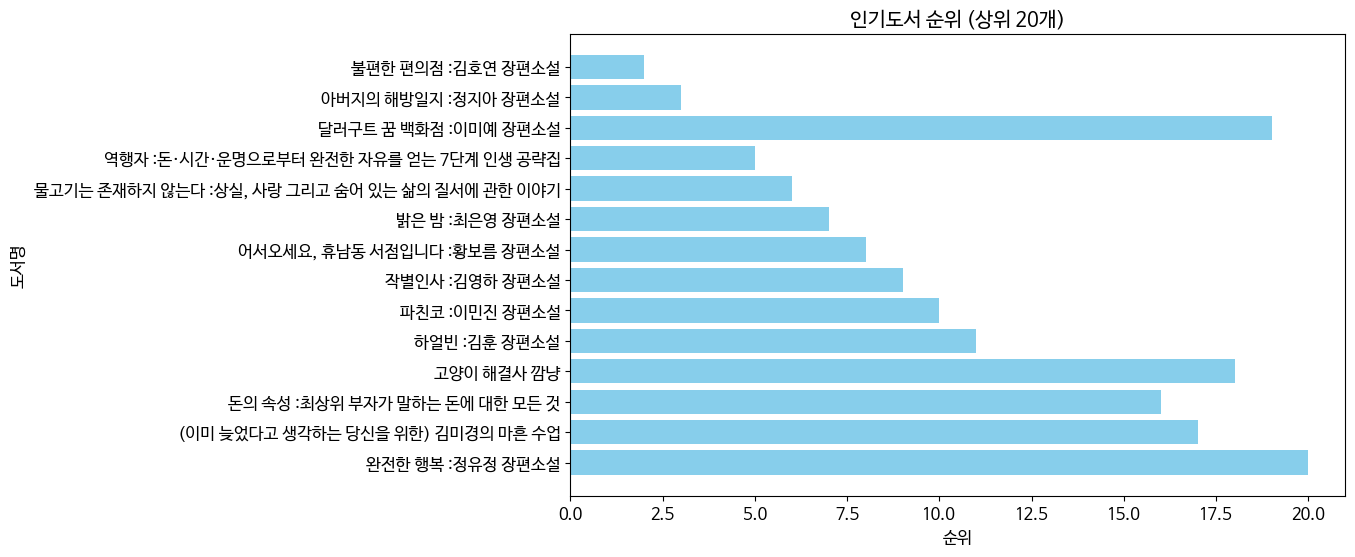

In [108]:
import matplotlib.pyplot as plt

# 인기도서 순위 데이터 가져오기
rankings = books_df['순위'].astype(int)
books_names = books_df['도서명']

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.barh(books_names.head(20), rankings.head(20), color='skyblue')  # head(20)을 사용하여 상위 20개만 선택
plt.xlabel('순위')
plt.ylabel('도서명')
plt.title('인기도서 순위 (상위 20개)')
plt.gca().invert_yaxis()  # y 축 역순으로 변경하여 1위가 위로 오도록 설정
plt.show()

# 원 그래프로 표시하기

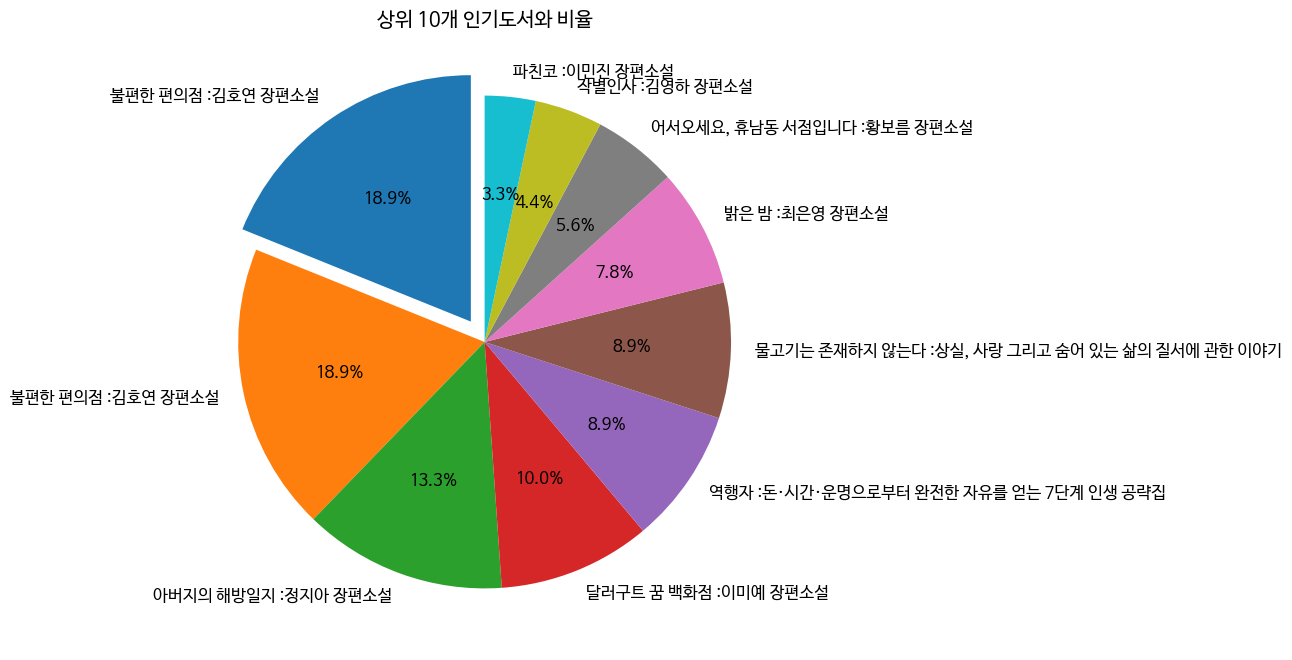

In [107]:
# 순위별 도서 수 세기
# 상위 10개의 도서명과 해당 도서의 비율(퍼센트) 계산
# top_10_books = books_df['도서명'].head(10)
# book_percentages = (books_df['순위'].value_counts(normalize=True) * 100).head(10)

# # 파이 그래프로 나타내기
# plt.figure(figsize=(8, 8))
# plt.pie(book_percentages, labels=top_10_books, autopct='%.1f%%', startangle=90, explode=[0.1]+[0]*9)
# plt.title('상위 10개 인기도서와 비율')
# plt.show()

# 상위 10개의 도서명과 해당 도서의 비율(퍼센트) 계산
top_10_books = books_df['도서명'].head(10)
book_percentages = books_df.groupby('도서명')['순위'].count().sort_values(ascending=False).head(10) * 100 / len(books_df)

# 파이 그래프로 나타내기
plt.figure(figsize=(8, 8))
plt.pie(book_percentages, labels=top_10_books, autopct='%.1f%%', startangle=90, explode=[0.1] + [0] * 9)
plt.title('상위 10개 인기도서와 비율')
plt.show()

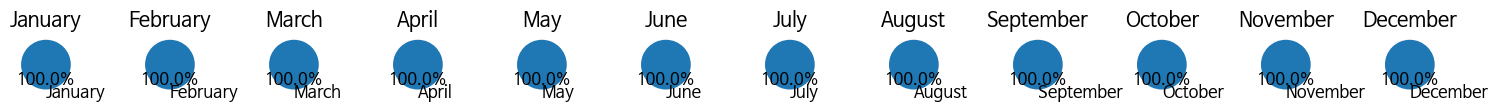

In [86]:
import matplotlib.pyplot as plt

# 월별 데이터
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data = [50, 30, 40, 60, 70, 80, 90, 100, 110, 120, 130, 140]

# 한 줄에 서로 다른 크기로 파이 그래프 그리기
plt.figure(figsize=(15, 5))

for i in range(len(months)):
    plt.subplot(1, 12, i+1)
    plt.pie([data[i]], labels=[months[i]], autopct='%1.1f%%', startangle=90, counterclock=False)
    plt.title(months[i])

plt.tight_layout()

In [37]:
# 라이브러리 설치하기
!pip install wordcloud

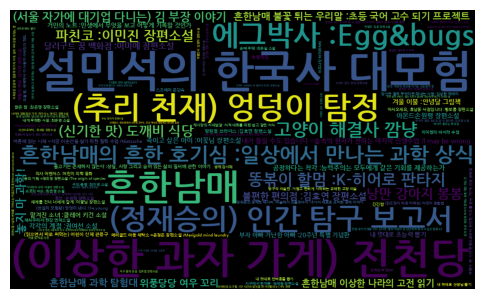

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. 자신의 컴퓨터 환경에 맞는 한글 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'  # (코랩)폰트 지정

# 도서명 데이터에서 단어 빈도 계산
word_frequencies = books_df['도서명'].value_counts().to_dict()

# 워드 클라우드 생성
wc = WordCloud(width=1000, height=600, background_color="black", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(word_frequencies))
plt.axis("off")
plt.show()

# 파일로 저장
wc.to_file('./인기도서_워드클라우드.png')

In [ ]:
import os
import sys
import urllib.request
import datetime
import time
import json
import pandas as pd

now = datetime.datetime.now()
datas = []   #csv파일을 위한 변수

client_id = ''          # 자신의 client_id
client_pw = ''          # 자신의 client_secret
PATH = './data'         # 수집 데이터 저장 폴더


#[CODE 1]
def get_RequestUrl(url):
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_pw)

    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print(f"[{now.strftime('%Y년%m월%d일 %H시%M분%S초')}] Url Request Success")
            return response.read().decode('utf-8')

    except Exception as e:
#         if response.getcode() == 400 and datas:
#             return None
        print(e)
        print(f"[{now.strftime('%Y년%m월%d일 %H시%M분%S초')}] Error for URL : {url}" )
        return None


#[CODE 2]  네이버 검색 API
def get_NaverSearch(node, keyword, start, display):
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(keyword), start, display)

    url = base + node + parameters
    responseDecode = get_RequestUrl(url)   #[CODE 1]

    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)

#[CODE 3]
def get_PostData(node, post, jsonResult, cnt):
    if node == 'book':
        data = {'제목':post['title'],
                '저자':post['author'],
                '출판사':post['publisher'],
                '출간일':post['pubdate'],
                '링크':post['link'],
                '이미지':post['image']}
    elif node == 'news':
        data = {'제목':post['title'],
                '링크':post['originallink'],
                '내용':post['description']}
    elif node == 'shop':
        data = {'제목':post['title'],
                '브랜드':post['brand'],
                '제조사':post['maker'],
                '가격':post['lprice'],
                '이미지':post['image']}

    jsonResult.append(data)
    datas.append(data)

    return

#[CODE 0]
def main():
    global node, keyword

    nodeType = '''-----------------------------
    네이버 검색 대상입니다.
      1.book,  2.news,  3.shop
    -----------------------------'''
    print(nodeType)
    node = input('번호를 선택하세요.[1:책, 2:뉴스, 3:쇼핑]')
    if node == '1': node = 'book'
    elif node == '2': node = 'news'
    elif node == '3': node = 'shop'
    else:
        node == '1'
        node = 'book'

    keyword = input(f'{node} 검색할 검색어를 입력하세요: ')

    display, cnt = 100, 0
    jsonResult = []
    jsonResponse = get_NaverSearch(node, keyword, 1, display)  #[CODE 2]
    total = jsonResponse['total']

    while ((jsonResponse != None) and (jsonResponse['display'] != 0)):
        for post in jsonResponse['items']:
            cnt += 1
            get_PostData(node, post, jsonResult, cnt)  #[CODE 3]

        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = get_NaverSearch(node, keyword, start, total)
#     print(f'가져올 데이터 : {total} 건')

    # with open(f'{PATH}/naver_{node}_{keyword}', 'w', encoding='utf8') as outfile:
    #     jsonFile = json.dumps(jsonResult,  indent=4, sort_keys=True,  ensure_ascii=False)

    #     outfile.write(jsonFile)

    print("가져온 데이터 : %d 건" %(cnt))



    # csv 파일로 저장하기
    file = f'{PATH}/naver_{node}_{keyword}.csv'
    df = pd.DataFrame(datas)
    df.to_csv(file, index=False, encoding="utf-8-sig")
    print(f'{PATH}/naver_{node}_{keyword}.csv SAVED')
    return df

#-----------
# 시작
#-----------
df = main()
df



---



#### (24.2.29 서비스 종료됨)[실습] :  네이버 Papago API 사용하여 번역하기

In [ ]:
# import os
# import sys
# import urllib.request
# import datetime
# import json


# client_id = ''  # 자신의 파파고 NMT API ID
# client_pw = ''            # 자신의 파파고 NMT API PASSWORD

# news = []   #csv파일을 위한 변수

# #[CODE 1]
# def papago(prompt, lang=1):

#     encText = urllib.parse.quote(prompt)
#     if lang == 1 :
#         data = "source=ko&target=en&text=" + encText
#     else:
#         data = "source=en&target=ko&text=" + encText
#     url = "https://openapi.naver.com/v1/papago/n2mt"

#     req = urllib.request.Request(url)
#     req.add_header("X-Naver-Client-Id", client_id)
#     req.add_header("X-Naver-Client-Secret", client_pw)

#     try:
#         response = urllib.request.urlopen(req, data=data.encode("utf-8") )
#         if response.getcode() == 200:
#             print(f"[{now.strftime('%Y년%m월%d일 %H시%M분%S초')}] Url Request Success")
#             responseDecode = response.read().decode('utf-8')

#             if responseDecode == None:
#                 return None
#             else:
#                 return json.loads(responseDecode)

#     except Exception as e:
#         print(e)
#         print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
#         return None

# # 메인
# lang= int(input('[선택] 1:한글->영어, 2:영어->한글: '))
# txt =  '한글' if lang==1 else '영어'
# prompt= input(f'[번역] 변환할 문장을 입력하세요.[{txt}로 입력]: ')

# jsonResponse = papago(prompt, lang)  # 파파고 번역
# jsonResponse
# print('-'*50)
# print(f"[번역 결과] => {jsonResponse['message']['result']['translatedText']}")


-------------------------

### <a name="2)한글텍스트Cleansing">2) 한글 텍스트 Cleansing</a>

#### 1.라이브러리 설치

In [ ]:
# 자연어처리 형태소 분석 및 토큰화
!pip install nltk

In [ ]:
# (한글)자연어처리 형태소 분석 및 토큰화
# (WinOS에서는 konlpy를 사용하기 위해 JDK를 설치해야 오류가 없어 코랩에서 실행함)
!pip install konlpy

In [ ]:
# html tag parsing을 위한 라이브러리
!pip install beautifulsoup4

In [ ]:
# 사이킷런 CountVectorizer클래스 사용 : 단어 빈도수 추출
!pip install scikit-learn

#### 2.한글 테스트 자연어 처리(Text Cleansing)
- 앞에서 OpenAPI를 사용하여 뉴스 데이터를 가져온 뒤에 아래 코트를 실행시키도록 한다.


In [ ]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import konlpy
import nltk

def clean_korean_documents(documents):
    #텍스트 정제 (HTML 태그 제거)
    for i, document in enumerate(documents):
        document = BeautifulSoup(document, 'html.parser').text
        documents[i] = document

    #텍스트 정제 (특수기호 제거)
    for i, document in enumerate(documents):
        document = re.sub(r'[^ ㄱ-ㅣ가-힣]', '', document) #특수기호 제거, 정규 표현식
        documents[i] = document

    #텍스트 정제 (형태소 분석)
    for i, document in enumerate(documents):
        okt = konlpy.tag.Okt()
        clean_words = []
        for word in okt.pos(document, stem=True): #어간 추출
            if word[1] in ['Noun', 'Verb', 'Adjective']: #명사, 동사, 형용사
                clean_words.append(word[0])
        document = ' '.join(clean_words)
        documents[i] = document

    #텍스트 정제 (불용어 제거)
    df = pd.read_csv('https://raw.githubusercontent.com/cranberryai/todak_todak_python/master/machine_learning_text/clean_korean_documents/korean_stopwords.txt', header=None)
    df[0] = df[0].apply(lambda x: x.strip())
    stopwords = df[0].to_numpy()
    nltk.download('punkt')
    for i, document in enumerate(documents):
        clean_words = []
        for word in nltk.tokenize.word_tokenize(document):
            if word not in stopwords: #불용어 제거
                clean_words.append(word)
        documents[i] = ' '.join(clean_words)

    return documents


def clean_target_feature(data):
    x_data = data.to_list()
    return clean_korean_documents(x_data)



# ---------------------
# 1.클린징할 파일 가져오기
file = f'{PATH}/naver_{node}_{keyword}.csv'  # 앞에서 만들어진 파일 사용하기
df = pd.read_csv(file)

# 2.클린징할 컬럼 선택해서 클린징하기
# (앞 OpenAPI검색에서 2.news 검색을 한 후 실행하기)
df['제목'] = clean_target_feature(df['제목'])  # 기사 제목
df['내용'] = clean_target_feature(df['내용'])  # 기사 내용

# 3.클린징 결과 csv 파일로 저장하기
file = f'{PATH}/naver_{node}_{keyword}_clean.csv'
df.to_csv(file, index=False, encoding="utf-8-sig")
print(f'{file} SAVED')

df.head()


#### 3.워드 클라우드 만들기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

# 말뭉치를 토큰화하여 빈도수 가져오기
def get_wordTokenCount(corpus):
    from sklearn.feature_extraction.text import CountVectorizer

    # 말뭉치를 토큰화하기
    vect = CountVectorizer().fit(corpus)
    count = vect.transform(corpus).toarray().sum(axis=0)

    # 토큰 빈도수로 정렬하고 토큰명 추출
    idx = np.argsort(-count)  # 내림 정렬하여 인덱스 반환: 토큰의 인덱스
    count = count[idx]        # 토큰의 빈도수
    feature_name = np.array(vect.get_feature_names_out())[idx]  # 토큰값

    # 빈도수 많은 순서대로 토큰명 10개만 출력
    print(list(zip(feature_name, count))[:10])

    return feature_name, count


# 단어(토큰) 빈도수 막대 그래프 그리기
def draw_wordTokenCountGraph(data, freq):
    plt.bar(data, freq)
    plt.grid()
    plt.show()

    # 그래프 그림 저장히기
    plt.savefig(f'./token_bar_graph.png')

# 워드클라우드 만들기
def make_wordcloud(feature_name, count):
    # 한글 폰트 경로를 설정
    # font_path = 'NanumGothic'  #/usr/share/fonts/truetype/nanum/NanumGothic.ttf  #코랩
    font_path = 'malgun'  # C:/Windows/Fonts/                                  #window

    # (토큰명, 빈도수) 딕셔너리 타입으로 변환
    data = dict(zip(feature_name, count))

    # 워드클라우드로 그래프로 시각화
    wc = WordCloud(width = 1000, height = 600, background_color="black", font_path=font_path)
    plt.imshow(wc.generate_from_frequencies(data)) #딕셔너리
    plt.axis("off")
    plt.show()

    # 이미지 파일로 저장하기
    wc.to_file(f'./워드클라우드.png')


In [ ]:
import pandas as pd

# 1.텍스트 말뭉치(corpus) 데이터 지정하기
corpus = df['제목'].to_list()
# print(corpus)

# 2.말뭉치를 토큰화하여 빈도수 가져오기
feature_name, count = get_wordTokenCount(corpus)

# 3.단어(토큰) 빈도수 막대 그래프 그리기(상위 10개)
# draw_wordTokenCountGraph(feature_name[:10], count[:10])

# 3.워드 클라우드 만들기
make_wordcloud(feature_name, count)



---



### <a name="3)웹이미지수집하기">3) 웹 이미지 수집하기</a>

#### 1.웹 이미지 화면에 출력하기

In [ ]:
from IPython.display import Image
Image(url='https://shopping-phinf.pstatic.net/main_3815224/38152244716.20230516165404.jpg')

#### 2.웹 이미지 파일로 저장하기

In [ ]:
import requests
from io import BytesIO
from PIL import Image

# 다운받을 이미지 url
urls = [
    "https://shopping-phinf.pstatic.net/main_3815224/38152244716.20230516165404.jpg",
    "https://shopping-phinf.pstatic.net/main_3726611/37266116619.20230119071117.jpg"
]
# 파일로 저장하기
for idx, url in enumerate(urls):
    res = requests.get(url)                   # url 요청
    img = Image.open(BytesIO(res.content))    # 응답결과(res.content)바이트파일 이미지 파일로 오픈
    img.save(f'./testimg_{idx}.png', 'png')   # 'png'이미지로(만) 저장

#### [실습] : 웹 이미지 수집하기
- 앞에서 저장한 쇼핑 목록에 있는 URL을 이용하여 이미지 저장하기

In [ ]:
# 이미지 다운로드 하기
import pandas as pd
import requests
from io import BytesIO
from PIL import Image
import time
import os

# 자신에게 맞게 폴더/파일 위치 정보를 수정한다.
FILE = f'./data/naver_shop_샌들.csv'  # 앞에서 자신이 검색한 쇼핑 파일
ImgFolder = f'./image/download/'      # 다운받을 이미지 폴더
MAX = 10                              # 이미지 파일 다운로드 건수

def getImageUrl(file):
    print(f'읽은 파일명: {file}')
    df = pd.read_csv(file, encoding='utf-8') # 이미지가 있는 쇼핑 파일 불러오기
    return df['이미지'].to_list()

def createDirectory(directory): # 다운받을 이미지 폴더 만들기
    try:
        if not os.path.exists(directory):
            print(f'{directory} 폴더가 생성되었습니다.')
            os.makedirs(directory)
        print(f'이미지 폴더 위치 : {directory}')
    except OSError:
        print("Error: Failed to create the directory.")

def downloadImageFile(urls, imgfolder):
    start = time.time()             # 이미지 다운로드 속도 time check
    for idx, url in enumerate(urls):
        if idx == MAX:
            break  # MAX 건수만 처리하기
        res = requests.get(url)     # request.get 요청
#         print(f'[{idx+1:2>}][{time.time() - start}] : {url}')  # 이미지 다운로드 시간 체크
        print(f'[{idx+1:0>2}] : {url}')  # 이미지 다운로드 시간 체크
        img = Image.open(BytesIO(res.content))  #Img open
        img.save(f'{imgfolder}testimage_{idx}.png', 'png')
    return idx


urls = getImageUrl(FILE)                # 이미지 URL 목록 가져오기
createDirectory(ImgFolder)              # 다운받을 이미지 폴더 만들기
totalcnt = downloadImageFile(urls, ImgFolder)      # 이미지 다운로드하기
print(f'총 다운로드 건수: {totalcnt}')


---------------------------

끝!